# SymPy Cheat Notebook

<div style="text-align: right"> 
M. Pritzkoleit, J. Winkler, 01'2019 
<br>
Institut für Regelungs- und Steuerungstheorie
<br>
TU Dresden
</div>

This notebook provides an overview about frequently used SymPy functionalities especially useful for control purposes.

The documentation of the latest SymPy release can be found at : https://docs.sympy.org/latest/index.html

For keyboard shortcuts drastically improving the user experience in Jupyter notebook see the help menu or press the littel keyboard icon in the command symbol line at the top of the notebook. The most important ones are:

``RET`` --> Enter a cell, i.e. start edit mode (green border around cell)

``ESC`` --> Leave a cell, i.e. start command mode (blue border around cell)

**In edit mode:**

``STRG + RET`` --> Execute current cell

``SHIFT + RET`` --> Execute current cell and jump to the next cell

``ALT + RET`` --> Execute current cell, open a new cell below and jump to the new cell

``STRG + SHIFT + -`` --> Split current cell at cursor position

**In command mode:**

``A`` --> Create new cell above

``B`` --> Create new cell below

``D`` ``D`` --> Delete current cell

``C`` --> Copy cell to clipboard

``X`` --> Cut cell to clipboard

``V`` --> Insert cell from clipboard below currently selected cell

``SHIFT + M`` Merge current cell with cell below

``M`` Convert cell to a markdown cell used for text and comments only

``Y`` Change cell to a code cell used for computations (the default)

---

## Contents
### Basics
* [How to import SymPy?](#import)

* [How to setup LaTeX printing?](#latex)

### Definitions
* [How to define a symbol?](#symbol)

* [How to define multiple symbols at once?](#symbols)

* [How to define a symbolic matrix expression?](#matrix-symbol)

* [How to define a symbolic function of a variable?](#function)

* [How to define a row vector?](#rowvector)

* [How to define a column vector?](#colvector)

* [How to define a 2D matrix?](#2dmatrix)

### Operations
* [How to simplify an expression?](#simplify)

* [How to expand an expression?](#expand)

* [How to concatenate vectors and matrices?](#concat)

* [How to substitute variables by other variables?](#subs)

* [How to find all symbols in an expression?](#free_symbols)

### Computation
* [How to solve an algebraic equation?](#solve)

* [How to compute the rank of a matrix?](#rank)

* [How to compute the inverse of a matrix?](#inverse)

* [How to compute the transpose of a matrix?](#transpose)

* [How to compute the eigenvalues and eigenvectors of a matrix?](#eigen)

* [How to compute the controllability matrix?](#control)

* [How to compute the observabiltiy matrix?](#obs)

* [How to compute the jacobian of a vector?](#jacobian)

* [How to compute the gradient of an expression?](#gradient)

### Export
* [How to create a callable function from an expression?](#callable)

* [How to export an expression to C-code?](#ccode)

---

## Basics

### How to import SymPy? <a class="anchor" id="import"></a>

In [2]:
import sympy as sp

### How to setup LaTeX printing? <a class="anchor" id="latex"></a>

In [4]:
from sympy import init_printing
init_printing()

---

## Definitions

### How to define a symbol? <a class="anchor" id="symbol"></a>

In [144]:
t = sp.Symbol('t')
t

### How to define multiple symbols at once? <a class="anchor" id="symbols"></a>

In [145]:
a, b, c, d = sp.symbols('a b c d')
a, b, c, d

**Note:** Only the last symbol is printed. If you want to show several symbols simultaneously use the notation shown above.

In [146]:
a
b
c

### How to define a symbolic matrix expression? <a class="anchor" id="matrix-symbol"></a>

In [147]:
A = sp.MatrixSymbol('A', 3, 3) # 3x3 dimensions
A

### How to define a symbolic function of a variable? <a class="anchor" id="function"></a>

In [148]:
s = sp.Function('s')(t)
s

**Note:** Definition of functions are useful if you need to differentiate the expression later, see [How to differentiate an expression?](#diff)

### How to define a row vector? <a class="anchor" id="rowvector"></a>

In [149]:
a1, a2 = sp.symbols('a1, a2')
a = sp.Matrix([[a1, a2]])
a

### How to define a column vector? <a class="anchor" id="colvector"></a>

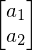

In [150]:
a1, a2 = sp.symbols('a1, a2')
a = sp.Matrix([[a1], [a2]])
a

### How to define a 2D matrix?  <a class="anchor" id="2dmatrix"></a>

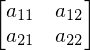

In [151]:
a11, a12, a21, a22 = sp.symbols('a11, a12, a21, a22')
A = sp.Matrix([[a11, a12], [a21, a22]])
A

---

## Operations

### How to simplify an expression? <a class="anchor" id="simplify"></a>

In [152]:
a, b, c = sp.symbols('a, b, c')

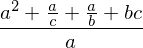

In [153]:
d = (a/c + c*b + a**2 + a/b)/a
d

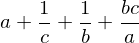

In [154]:
d.simplify()

### How to expand an expression? <a class="anchor" id="expand"></a>

In [155]:
x = sp.Symbol('x')

In [156]:
y = (x+2)**2
y

In [157]:
y = y.expand()

### How to concatenate vectors and matrices? <a class="anchor" id="concat"></a>

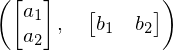

In [158]:
a1, a2, b1, b2 = sp.symbols('a1, a2, b1, b2')
a = sp.Matrix([[a1], [a2]]) # column vector
b = sp.Matrix([[b1 ,b2]]) # row vector
a, b

Concatenate two *column* vectors columnwise:

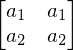

In [159]:
c = a.row_join(a)
c

Concatenate two *column* in one column:

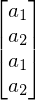

In [160]:
d = a.col_join(a)
d

Concatenate two *row* vectors in one row:

In [161]:
e = b.row_join(b)
e

Concatenate two *row* vectors rowwise:

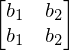

In [162]:
f = b.col_join(b)
f

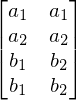

In [163]:
g = c.col_join(f)
g

### How to substitute variables by other variables? <a class="anchor" id="subs"></a>

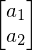

In [164]:
a1, a2, b1, b2 = sp.symbols('a1, a2, b1, b2')
a = sp.Matrix([[a1], [a2]]) # column vector
a

In [165]:
b = a.subs(([a1, b1], [a2, b2]))
b

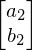

In [166]:
c = b.subs(b1, a2)
c

### How to find all symbols in an expression? <a class="anchor" id="free_symbols"></a>

In [167]:
a1, a2 = sp.symbols('a1, a2')

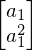

In [168]:
a = sp.Matrix([[a1], [a1**2]]) # column vector
a

In [169]:
a.free_symbols

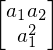

In [170]:
b = sp.Matrix([[a1*a2], [a1**2]]) # column vector
b

In [171]:
b.free_symbols

---

## Computation

### How to solve an algebraic equation for a symbol? <a class="anchor" id="solve"></a>

In [172]:
a1, a2, b1, b2 = sp.symbols('a1, a2, b1, b2')

In [173]:
a = a1/a2 + b2 # a = 0 

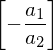

In [174]:
b = sp.solve(a, b2)
b

### How to differentiate an expression? <a class="anchor" id="diff"></a>

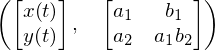

In [175]:
# Symbols do not depend on anything
a1, a2, b1, b2 = sp.symbols('a1, a2, b1, b2')
t = sp.Symbol('t')

# Functions depend on something, here t
x = sp.Function('x')(t)
y = sp.Function('y')(t)

# More complex expressions consisting of symbols and functions
f = sp.Matrix([x, y])
g = sp.Matrix([[a1, b1], [a2, a1*b2]])
f, g

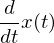

In [176]:
x.diff(t)

In [177]:
a1.diff(t)

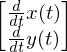

In [178]:
f.diff(t)

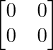

In [179]:
g.diff(t)

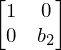

In [180]:
g.diff(a1)

In [181]:
s = 1/4*t**2 + 5*t
s

In [182]:
v = s.diff(t) # = s.diff(t, 1)
v

2.nd derivative

In [183]:
a = s.diff(t, 2)
a

### How to compute the jacobian of a function? <a class="anchor" id="jacbobian"></a>

Given a vector-valued function $f : \mathbb{R}^2 \to \mathbb{R}^2$ with $f(x) = \left(f_1, f_2\right)^T = \left(x_1 x_2, x_2^2\right)^T$ and $x = \left(x_1, x_2\right)^T$ we want to calculate the Jacobian

$$
\begin{pmatrix}
\frac{\partial f_1}{x_1} & \frac{\partial f_1}{x_2}\\
\frac{\partial f_2}{x_1} & \frac{\partial f_2}{x_2}
\end{pmatrix}
$$

Define the independent variables and hold them in a vector:

In [184]:
x1, x2 = sp.symbols('x_1, x_2')

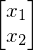

In [185]:
x = sp.Matrix([[x1], [x2]])
x

Define the vector valued function:

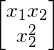

In [186]:
f = sp.Matrix([[x1*x2], [x2**2]])
f

Calculate the Jacobian:

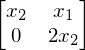

In [187]:
f.jacobian(x)

### How to compute the rank of a matrix? <a class="anchor" id="rank"></a>

In [188]:
a1, a2, b1, b2 = sp.symbols('a1, a2, b1, b2')

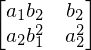

In [189]:
A = sp.Matrix([[a1*b2, b2], [a2*b1**2, a2**2]])
A

In [190]:
r = A.rank()
r

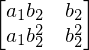

In [191]:
B = sp.Matrix([[a1*b2, b2], [a1*b2**2, b2**2]])
B

In [192]:
r = B.rank()
r


### How to compute the inverse of a matrix? <a class="anchor" id="inverse"></a>

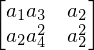

In [193]:
a1, a2, a3, a4 = sp.symbols('a_1, a_2, a_3, a_4')
A = sp.Matrix([[a1*a3, a2], [a2*a4**2, a2**2]])
A

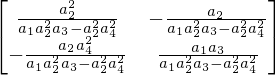

In [194]:
A.inv()

### How to compute the transpose of a matrix? <a class="anchor" id="transpose"></a>

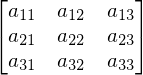

In [195]:
a11, a12, a13, a21, a22, a23, a31, a32, a33 = sp.symbols('a_{11}, a_{12}, a_{13}, a_{21}, a_{22}, a_{23}, a_{31}, a_{32}, a_{33}')
A = sp.Matrix([[a11, a12, a13], [a21, a22, a23], [a31, a32, a33]])
A

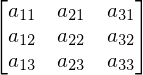

In [196]:
A.T

### How to compute the eigenvalues and eigenvectors of a matrix? <a class="anchor" id="eigen"></a>

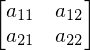

In [197]:
a11, a12, a21, a22 = sp.symbols('a_{11}, a_{12}, a_{21}, a_{22}')
A = sp.Matrix([[a11, a12], [a21, a22]])
A

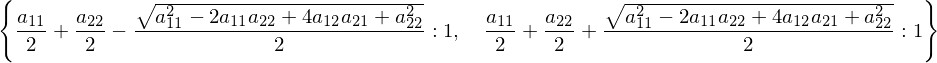

In [198]:
A.eigenvals()

This is a dictionary. Each entry consists of the eigenvalue as key and its algebraic multiplicity as value. Use ``list(A.eigenvals().keys())`` to access the eigenvalues only:

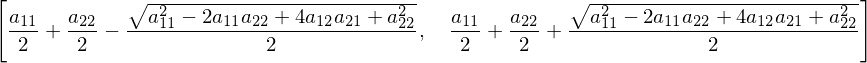

In [199]:
EV=A.eigenvals()
list(EV.keys())

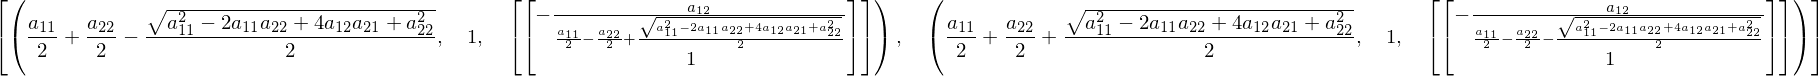

In [200]:
A.eigenvects()

For each eigenvalue this command returns a tuple containing the eigenvalue, its algebraic multiplicity and the corresponding eigenvector(s). See https://docs.sympy.org/latest/tutorial/matrices.html#eigenvalues-eigenvectors-and-diagonalization for more details.

### How to compute the observability matrix? <a class="anchor" id="obs"></a>

We want to calculate the observability matrix

\begin{pmatrix}
c\\
c\cdot A\\
c\cdot A^2
\end{pmatrix}

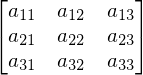

In [201]:
a11, a12, a13, a21, a22, a23, a31, a32, a33 = sp.symbols('a_{11}, a_{12}, a_{13}, a_{21}, a_{22}, a_{23}, a_{31}, a_{32}, a_{33}')
A = sp.Matrix([[a11, a12, a13], [a21, a22, a23], [a31, a32, a33]])
A

In [202]:
c1, c2, c3 = sp.symbols('c_1, c_2, c_3')
c = sp.Matrix([[c1, c2, c3]])
c

Since $c$, $c \cdot A$, $\ldots$ are row vectors, it is straightforward how to build the matrix:

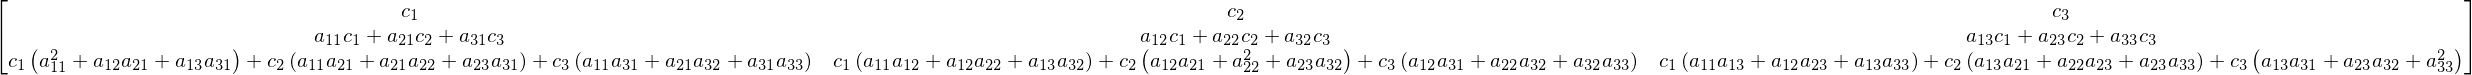

In [203]:
sp.Matrix([c, c*A, c*A**2])

### How to compute the controllability matrix? <a class="anchor" id="control"></a>

The controllability matrix reads

\begin{pmatrix}
b, A\cdot b, A^2 b
\end{pmatrix}

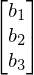

In [204]:
b1, b2, b3 = sp.symbols('b_1, b_2, b_3')
b = sp.Matrix([b1, b2, b3])
b

Since $b$, $A \cdot b$, $\ldots$ are column vectors the construction is a little bit spooky:

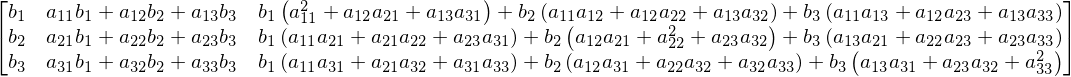

In [205]:
sp.Matrix([b.T, (A*b).T, (A**2*b).T]).T

---

## Export

### How to create a callable function from an expression? <a class="anchor" id="callable"></a>

This is interesting when having done all the symbolic calculations and one wants to to some numerical simulations.

In [206]:
a1, a2, b1, b2 = sp.symbols('a1, a2, b1, b2')

In [207]:
a = a1*a2 + b1 - b2*a1
a

In [208]:
args = (a1, a2, b1, b2)

In [209]:
a_fnc = sp.lambdify(args, a)

In [210]:
res = a_fnc(1, 0, 3, 2) # 1*0 - 1*2 + 3 = 1
res

### How to export an expression to C-code? <a class="anchor" id="ccode"></a>

In [211]:
a1, a2, b1, b2 = sp.symbols('a1, a2, b1, b2')

In [212]:
a = a1*a2 + b1 - b2*a1
a

In [213]:
sp.ccode(a)

'a1*a2 - a1*b2 + b1'

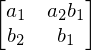

In [214]:
A = sp.Matrix([[a1, a2*b1],[b2, b1]])
A

For expressions with matrices, one has to provide a matrix symbol to assign values to. Hence, the following statement fails:

In [215]:
sp.ccode(A)

'// Not supported in C:\n// ImmutableDenseMatrix\nMatrix([\n[a1, a2*b1],\n[b2,    b1]])'

Instead, one has to proceed as follows:

In [216]:
AC = sp.MatrixSymbol('B', 2, 2)
AC

In [219]:
sp.ccode(A, AC)

'B[0] = a1;\nB[1] = a2*b1;\nB[2] = b2;\nB[3] = b1;'